### This notebook presents deaths over time for certain age groups with certain vaccination status

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv')
df = df.loc[(df['outcome'] == 'death') & (df['Vaccine product'] == 'all_types') & (df['Age group'] != 'all_ages_adj')]
df

,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
570,death,APR 2021,202114,12-17,all_types,0,35941.00,2,16455113.00,0.000000,0.012154,NaN,NaN,NaN,NaN,0
571,death,APR 2021,202114,18-29,all_types,0,2419632.00,23,29161336.00,0.000000,0.078872,NaN,NaN,NaN,NaN,0
572,death,APR 2021,202114,30-49,all_types,2,7005458.00,212,38674716.00,0.028549,0.548162,19.200621,NaN,NaN,NaN,0
573,death,APR 2021,202114,50-64,all_types,9,6988564.00,640,21582504.00,0.128782,2.965365,23.026269,NaN,NaN,NaN,0
574,death,APR 2021,202114,65-79,all_types,57,13695850.00,736,7291414.00,0.416184,10.094064,24.253822,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,death,MAR 2022,202213,18-29,all_types,0,21141285.00,1,11736410.45,0.000000,0.008521,NaN,NaN,NaN,NaN,1
1099,death,MAR 2022,202213,30-49,all_types,7,39170264.00,11,12627872.30,0.017871,0.087109,4.874398,NaN,NaN,NaN,1
1100,death,MAR 2022,202213,50-64,all_types,13,32000331.00,31,6313125.60,0.040625,0.491040,12.087274,NaN,NaN,NaN,1
1101,death,MAR 2022,202213,65-79,all_types,51,23478782.50,58,2137011.70,0.217217,2.714070,12.494719,NaN,NaN,NaN,1


In [4]:
df_young = df.loc[df['Age group'].isin(['12-17', '18-29', '30-49', '50-64'])]
df_old = df.loc[df['Age group'].isin(['65-79', '80+'])]

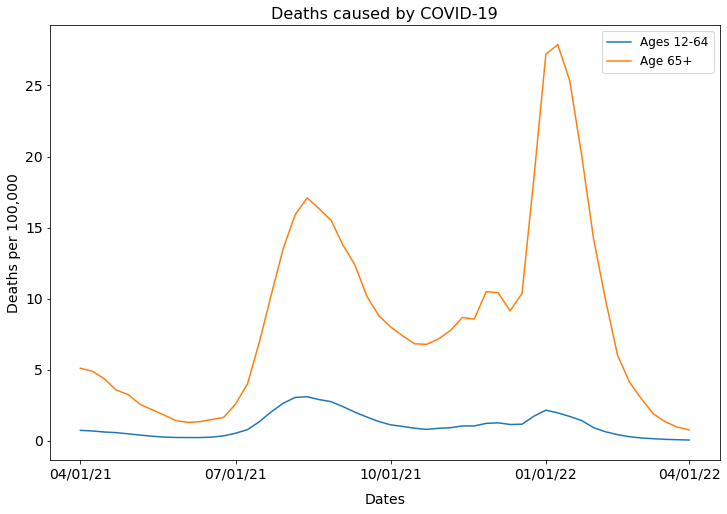

In [7]:
weeks = list(set(df_young['MMWR week']))

deaths_young = []
deaths_old = []
for week in weeks:
    deaths_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_young.loc[(df_young['MMWR week'] == week)]['Unvaccinated population'])
    deaths_young.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df_old.loc[(df_old['MMWR week'] == week)]['Unvaccinated population'])
    deaths_old.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))    

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths_young, label = "Ages 12-64")
plt.plot(weeks, deaths_old, label = "Age 65+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [8]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['65+'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
250,death,OCT 2021,202140,65+,all_types,24,1507310,765,26156427,1725,...,2.924711,39.869860,25.040099,13.632066,NaN,NaN,NaN,NaN,NaN,1
257,death,OCT 2021,202141,65+,all_types,28,2633320,702,25148990,1573,...,2.791365,37.446616,35.217473,13.415165,NaN,NaN,NaN,NaN,NaN,1
264,death,OCT 2021,202142,65+,all_types,24,3788751,679,24102071,1387,...,2.817185,33.883720,53.490407,12.027508,NaN,NaN,NaN,NaN,NaN,1
271,death,OCT 2021,202143,65+,all_types,32,4781341,694,23201371,1337,...,2.991203,34.053749,50.882059,11.384635,NaN,NaN,NaN,NaN,NaN,1
278,death,NOV 2021,202144,65+,all_types,43,5748091,719,22319812,1354,...,3.221353,35.739076,47.774758,11.094429,NaN,NaN,NaN,NaN,NaN,1
285,death,NOV 2021,202145,65+,all_types,40,7680473,772,20509797,1477,...,3.764055,40.186970,77.163735,10.676510,NaN,NaN,NaN,NaN,NaN,1
292,death,NOV 2021,202146,65+,all_types,65,9556086,800,18749149,1712,...,4.266860,47.984166,70.544741,11.245779,NaN,NaN,NaN,NaN,NaN,1
299,death,NOV 2021,202147,65+,all_types,78,11043297,804,17353932,1632,...,4.632956,46.599377,65.975738,10.058239,NaN,NaN,NaN,NaN,NaN,1
306,death,DEC 2021,202148,65+,all_types,111,12438252,864,16046834,2117,...,5.384240,61.842020,69.297895,11.485748,NaN,NaN,NaN,NaN,NaN,1
313,death,DEC 2021,202149,65+,all_types,115,13488636,819,15063174,2203,...,5.437101,65.649634,77.002088,12.074382,NaN,NaN,NaN,NaN,NaN,1


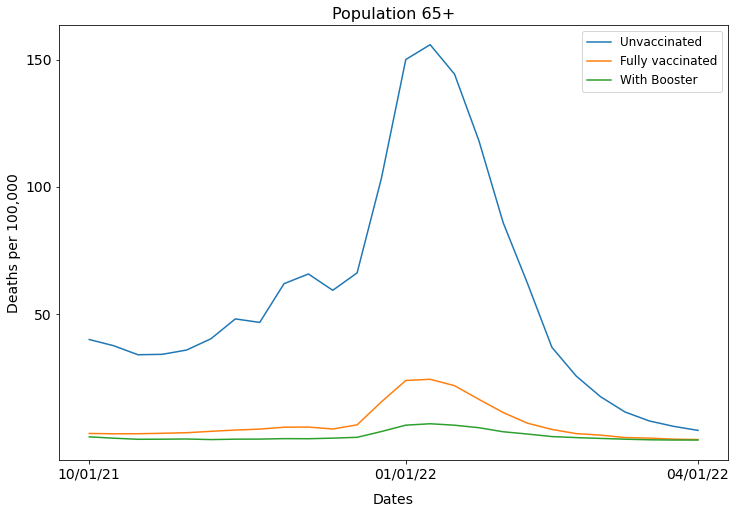

In [9]:
weeks = list(set(df['mmwr_week']))

deaths_vax = []
deaths_novax = []
deaths_boost = []
for week in weeks:
    deaths_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_with_outcome'])
    deaths_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_with_outcome'])
    deaths_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_with_outcome'])
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_population'])
    deaths_vax.append(deaths_vaccinated*100000/ppl_vaccinated)
    deaths_novax.append(deaths_unvaccinated*100000/ppl_unvaccinated)
    deaths_boost.append(deaths_boosted*100000/ppl_boosted)

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths_novax, label = "Unvaccinated")
plt.plot(weeks, deaths_vax, label = "Fully vaccinated")
plt.plot(weeks, deaths_boost, label = "With Booster")
plt.xticks(['202140', '202201', '202213'], ['10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.yticks([50, 100, 150], fontsize=14)
plt.legend(fontsize=12)
plt.title("Population 65+", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [10]:
"""
weeks = list(set(df['mmwr_week']))

deaths_vax = []
deaths_novax = []
deaths_boost = []
for week in weeks:
    deaths_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_with_outcome'])
    deaths_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_with_outcome'])
    deaths_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_with_outcome'])
    deaths_all = deaths_vaccinated + deaths_unvaccinated + deaths_boosted
    deaths_vax.append(deaths_vaccinated/deaths_all)
    deaths_novax.append(deaths_unvaccinated/deaths_all)
    deaths_boost.append(deaths_boosted/deaths_all)

deaths_all = {
    'With Booster': deaths_boost,
    'Fully vaccinated': deaths_vax,
    'Unvaccinated': deaths_novax, 
}

fig, ax = plt.subplots()
ax.stackplot(weeks, deaths_all.values(),
             labels=deaths_all.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title("Population 65+", fontsize=16)
ax.set_ylabel("Deaths per 100,000", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)

plt.show()
"""

'\nweeks = list(set(df[\'mmwr_week\']))\n\ndeaths_vax = []\ndeaths_novax = []\ndeaths_boost = []\nfor week in weeks:\n    deaths_vaccinated = sum(df.loc[(df[\'mmwr_week\'] == week)][\'primary_series_only_with_outcome\'])\n    deaths_unvaccinated = sum(df.loc[(df[\'mmwr_week\'] == week)][\'unvaccinated_with_outcome\'])\n    deaths_boosted = sum(df.loc[(df[\'mmwr_week\'] == week)][\'boosted_with_outcome\'])\n    deaths_all = deaths_vaccinated + deaths_unvaccinated + deaths_boosted\n    deaths_vax.append(deaths_vaccinated/deaths_all)\n    deaths_novax.append(deaths_unvaccinated/deaths_all)\n    deaths_boost.append(deaths_boosted/deaths_all)\n\ndeaths_all = {\n    \'With Booster\': deaths_boost,\n    \'Fully vaccinated\': deaths_vax,\n    \'Unvaccinated\': deaths_novax, \n}\n\nfig, ax = plt.subplots()\nax.stackplot(weeks, deaths_all.values(),\n             labels=deaths_all.keys(), alpha=0.8)\nax.legend(loc=\'upper left\')\nax.set_title("Population 65+", fontsize=16)\nax.set_ylabel("Deaths

[202140, 202141, 202142, 202143, 202144, 202145, 202146, 202147, 202148, 202149, 202150, 202151, 202152, 202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202213]


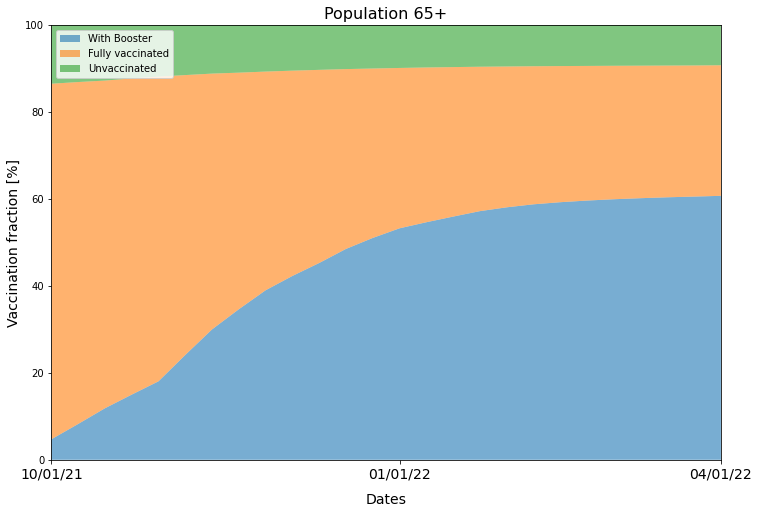

In [11]:
weeks = list(set(df['mmwr_week']))
print(weeks)

ppl_vax = []
ppl_novax = []
ppl_boost = []
for week in weeks:
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_population'])
    ppl_all = ppl_vaccinated + ppl_unvaccinated + ppl_boosted
    ppl_vax.append(ppl_vaccinated*100/ppl_all)
    ppl_novax.append(ppl_unvaccinated*100/ppl_all)
    ppl_boost.append(ppl_boosted*100/ppl_all)

ppl_all = {
    'With Booster': ppl_boost,
    'Fully vaccinated': ppl_vax,
    'Unvaccinated': ppl_novax, 
}
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

fig, ax = plt.subplots()
ax.stackplot(weeks, ppl_all.values(),
             labels=ppl_all.keys(), alpha=0.6)
ax.legend(loc='upper left')
ax.set_title("Population 65+", fontsize=16)
ax.set_ylabel("Vaccination fraction [%]", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)
plt.xticks(['202140', '202201', '202213'], ['10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.xlim(['202140', '202213'])
plt.ylim([0, 100])
plt.show()

In [13]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv')
df = df.loc[(df['outcome'] == 'death') & (df['Vaccine product'] == 'all_types') & (df['Age group'] != 'all_ages_adj')]
df

,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
570,death,APR 2021,202114,12-17,all_types,0,35941.00,2,16455113.00,0.000000,0.012154,NaN,NaN,NaN,NaN,0
571,death,APR 2021,202114,18-29,all_types,0,2419632.00,23,29161336.00,0.000000,0.078872,NaN,NaN,NaN,NaN,0
572,death,APR 2021,202114,30-49,all_types,2,7005458.00,212,38674716.00,0.028549,0.548162,19.200621,NaN,NaN,NaN,0
573,death,APR 2021,202114,50-64,all_types,9,6988564.00,640,21582504.00,0.128782,2.965365,23.026269,NaN,NaN,NaN,0
574,death,APR 2021,202114,65-79,all_types,57,13695850.00,736,7291414.00,0.416184,10.094064,24.253822,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,death,MAR 2022,202213,18-29,all_types,0,21141285.00,1,11736410.45,0.000000,0.008521,NaN,NaN,NaN,NaN,1
1099,death,MAR 2022,202213,30-49,all_types,7,39170264.00,11,12627872.30,0.017871,0.087109,4.874398,NaN,NaN,NaN,1
1100,death,MAR 2022,202213,50-64,all_types,13,32000331.00,31,6313125.60,0.040625,0.491040,12.087274,NaN,NaN,NaN,1
1101,death,MAR 2022,202213,65-79,all_types,51,23478782.50,58,2137011.70,0.217217,2.714070,12.494719,NaN,NaN,NaN,1


In [16]:
df1 = df.loc[df['Age group'].isin(['12-17', '18-29', '30-49'])]
df2 = df.loc[df['Age group'].isin(['50-64'])]
df3 = df.loc[df['Age group'].isin(['65-79'])]
df4 = df.loc[df['Age group'].isin(['80+'])]

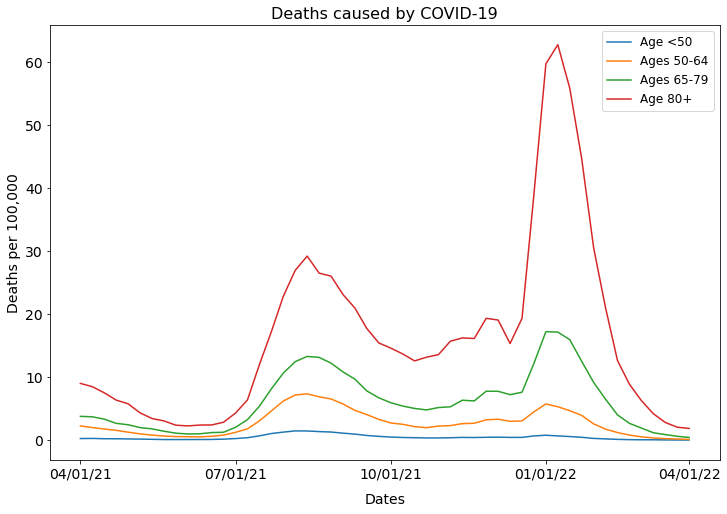

In [17]:
weeks = list(set(df_young['MMWR week']))

deaths1 = []
deaths2 = []
deaths3 = []
deaths4 = []
for week in weeks:
    deaths_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df1.loc[(df1['MMWR week'] == week)]['Unvaccinated population'])
    deaths1.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df2.loc[(df2['MMWR week'] == week)]['Unvaccinated population'])
    deaths2.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df3.loc[(df3['MMWR week'] == week)]['Unvaccinated population'])
    deaths3.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))
    deaths_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Vaccinated with outcome'])
    deaths_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated with outcome'])
    ppl_vaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Fully vaccinated population'])
    ppl_unvaccinated = sum(df4.loc[(df4['MMWR week'] == week)]['Unvaccinated population'])
    deaths4.append((deaths_vaccinated + deaths_unvaccinated)*100000/(ppl_vaccinated + ppl_unvaccinated))  

weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new
plt.yticks(fontsize=14)
plt.plot(weeks, deaths1, label = "Age <50")
plt.plot(weeks, deaths2, label = "Ages 50-64")
plt.plot(weeks, deaths3, label = "Ages 65-79")
plt.plot(weeks, deaths4, label = "Age 80+")
plt.xticks(['202114', '202127', '202140', '202201', '202213'], ['04/01/21', '07/01/21', '10/01/21', '01/01/22', '04/01/22'], fontsize=14)
#plt.yticks([0, 5, 10, 15, 20, 25], fontsize=14)
plt.legend(fontsize=12)
plt.title("Deaths caused by COVID-19", fontsize=16)
plt.ylabel("Deaths per 100,000", fontsize=14)
plt.xlabel("Dates", fontsize=14, labelpad=12)
plt.rcParams["figure.figsize"] = (12,8)

In [18]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['65+'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
250,death,OCT 2021,202140,65+,all_types,24,1507310,765,26156427,1725,...,2.924711,39.869860,25.040099,13.632066,NaN,NaN,NaN,NaN,NaN,1
257,death,OCT 2021,202141,65+,all_types,28,2633320,702,25148990,1573,...,2.791365,37.446616,35.217473,13.415165,NaN,NaN,NaN,NaN,NaN,1
264,death,OCT 2021,202142,65+,all_types,24,3788751,679,24102071,1387,...,2.817185,33.883720,53.490407,12.027508,NaN,NaN,NaN,NaN,NaN,1
271,death,OCT 2021,202143,65+,all_types,32,4781341,694,23201371,1337,...,2.991203,34.053749,50.882059,11.384635,NaN,NaN,NaN,NaN,NaN,1
278,death,NOV 2021,202144,65+,all_types,43,5748091,719,22319812,1354,...,3.221353,35.739076,47.774758,11.094429,NaN,NaN,NaN,NaN,NaN,1
285,death,NOV 2021,202145,65+,all_types,40,7680473,772,20509797,1477,...,3.764055,40.186970,77.163735,10.676510,NaN,NaN,NaN,NaN,NaN,1
292,death,NOV 2021,202146,65+,all_types,65,9556086,800,18749149,1712,...,4.266860,47.984166,70.544741,11.245779,NaN,NaN,NaN,NaN,NaN,1
299,death,NOV 2021,202147,65+,all_types,78,11043297,804,17353932,1632,...,4.632956,46.599377,65.975738,10.058239,NaN,NaN,NaN,NaN,NaN,1
306,death,DEC 2021,202148,65+,all_types,111,12438252,864,16046834,2117,...,5.384240,61.842020,69.297895,11.485748,NaN,NaN,NaN,NaN,NaN,1
313,death,DEC 2021,202149,65+,all_types,115,13488636,819,15063174,2203,...,5.437101,65.649634,77.002088,12.074382,NaN,NaN,NaN,NaN,NaN,1


[202140, 202141, 202142, 202143, 202144, 202145, 202146, 202147, 202148, 202149, 202150, 202151, 202152, 202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202213]


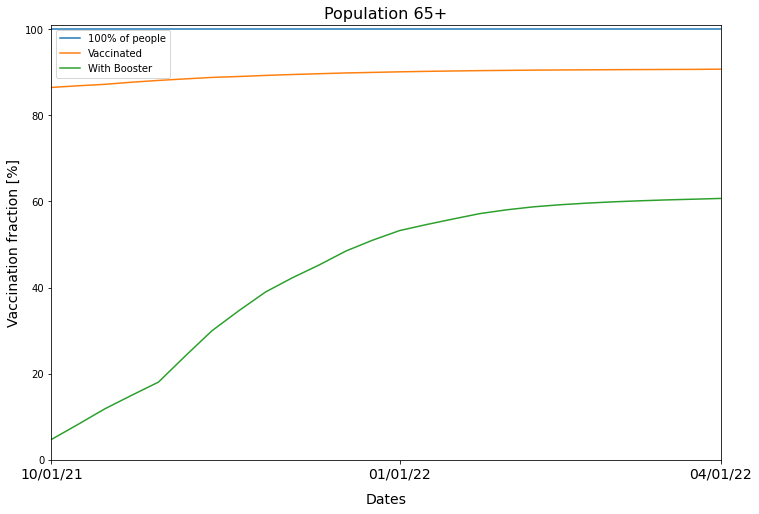

In [21]:
weeks = list(set(df['mmwr_week']))
print(weeks)

ppl_vax = []
ppl_novax = []
ppl_boost = []
for week in weeks:
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_population'])
    ppl_all = ppl_vaccinated + ppl_unvaccinated + ppl_boosted
    ppl_vax.append((ppl_vaccinated+ppl_boosted)*100/ppl_all)
    ppl_novax.append(ppl_unvaccinated*100/ppl_all)
    ppl_boost.append(ppl_boosted*100/ppl_all)

ppl_all = {
    'With Booster': ppl_boost,
    'Fully vaccinated': ppl_vax,
    'Unvaccinated': ppl_novax, 
}
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

fig, ax = plt.subplots()
ax.plot(weeks, len(weeks)*[100], label='100% of people')
ax.plot(weeks, ppl_vax, label='Vaccinated')
ax.plot(weeks, ppl_boost, label='With Booster')
ax.legend(loc='upper left')
ax.set_title("Population 65+", fontsize=16)
ax.set_ylabel("Vaccination fraction [%]", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)
plt.xticks(['202140', '202201', '202213'], ['10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.xlim(['202140', '202213'])
plt.ylim([0, 101])
plt.show()

In [22]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['18-49'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
248,death,OCT 2021,202140,18-49,all_types,1,466269,19,50152135,435,...,0.037885,1.378607,6.428018,36.389523,NaN,NaN,NaN,NaN,NaN,0
255,death,OCT 2021,202141,18-49,all_types,0,720461,20,50592139,368,...,0.039532,1.184187,NaN,29.955277,NaN,NaN,NaN,NaN,NaN,0
262,death,OCT 2021,202142,18-49,all_types,1,1070621,20,50859698,336,...,0.039324,1.096538,11.739765,27.884794,NaN,NaN,NaN,NaN,NaN,0
269,death,OCT 2021,202143,18-49,all_types,0,1438403,21,51024755,295,...,0.041156,0.977093,NaN,23.740923,NaN,NaN,NaN,NaN,NaN,0
276,death,NOV 2021,202144,18-49,all_types,2,1839911,19,51094531,301,...,0.037186,1.011929,9.309298,27.212657,NaN,NaN,NaN,NaN,NaN,0
283,death,NOV 2021,202145,18-49,all_types,2,2519006,21,50840518,307,...,0.041306,1.046841,13.184994,25.343780,NaN,NaN,NaN,NaN,NaN,0
290,death,NOV 2021,202146,18-49,all_types,2,3388897,31,50371951,349,...,0.061542,1.208731,20.481322,19.640687,NaN,NaN,NaN,NaN,NaN,0
297,death,NOV 2021,202147,18-49,all_types,4,4365522,23,49750671,344,...,0.046231,1.209891,13.204511,26.170815,NaN,NaN,NaN,NaN,NaN,0
304,death,DEC 2021,202148,18-49,all_types,1,5570656,30,48885768,382,...,0.061368,1.365429,76.063364,22.250019,NaN,NaN,NaN,NaN,NaN,0
311,death,DEC 2021,202149,18-49,all_types,3,6980186,21,47776809,386,...,0.043954,1.405990,32.713570,31.987481,NaN,NaN,NaN,NaN,NaN,0


[202140, 202141, 202142, 202143, 202144, 202145, 202146, 202147, 202148, 202149, 202150, 202151, 202152, 202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202213]


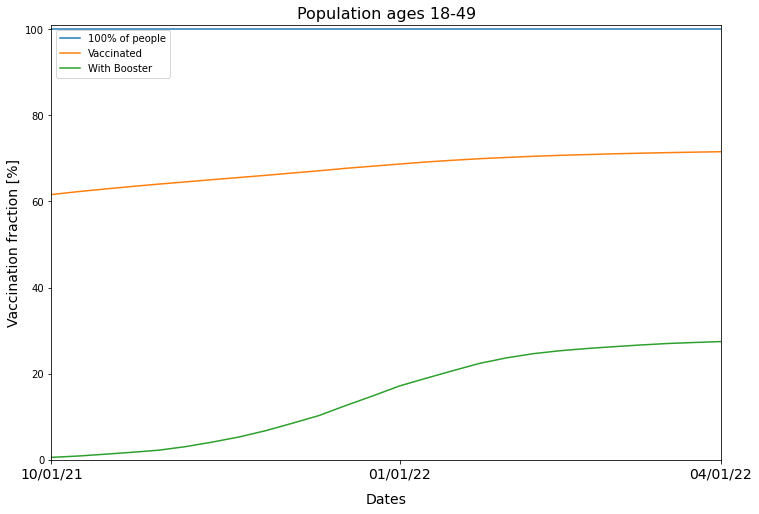

In [24]:
weeks = list(set(df['mmwr_week']))
print(weeks)

ppl_vax = []
ppl_novax = []
ppl_boost = []
for week in weeks:
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_population'])
    ppl_all = ppl_vaccinated + ppl_unvaccinated + ppl_boosted
    ppl_vax.append((ppl_vaccinated+ppl_boosted)*100/ppl_all)
    ppl_novax.append(ppl_unvaccinated*100/ppl_all)
    ppl_boost.append(ppl_boosted*100/ppl_all)

ppl_all = {
    'With Booster': ppl_boost,
    'Fully vaccinated': ppl_vax,
    'Unvaccinated': ppl_novax, 
}
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

fig, ax = plt.subplots()
ax.plot(weeks, len(weeks)*[100], label='100% of people')
ax.plot(weeks, ppl_vax, label='Vaccinated')
ax.plot(weeks, ppl_boost, label='With Booster')
ax.legend(loc='upper left')
ax.set_title("Population ages 18-49", fontsize=16)
ax.set_ylabel("Vaccination fraction [%]", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)
plt.xticks(['202140', '202201', '202213'], ['10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.xlim(['202140', '202213'])
plt.ylim([0, 101])
plt.show()

In [25]:
df = pd.read_csv('input_data/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Booster_Dose.csv')
df = df.loc[(df['outcome'] == 'death') & (df['vaccine_product'] == 'all_types') & (df['month'] != 'SEP 2021')]
df = df.loc[df['age_group'].isin(['50-64'])]
df

,outcome,month,mmwr_week,age_group,vaccine_product,boosted_with_outcome,boosted_population,primary_series_only_with_outcome,primary_series_only_population,unvaccinated_with_outcome,...,crude_primary_series_only_ir,crude_unvax_ir,crude_booster_irr,crude_irr,age_adj_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_booster_irr,age_adj_irr,continuity_correction
249,death,OCT 2021,202140,50-64,all_types,4,579564,104,27951570,874,...,0.372072,9.998601,14.487073,26.872749,NaN,NaN,NaN,NaN,NaN,0
256,death,OCT 2021,202141,50-64,all_types,8,830493,99,27911129,805,...,0.354697,9.363983,9.720903,26.399933,NaN,NaN,NaN,NaN,NaN,0
263,death,OCT 2021,202142,50-64,all_types,5,1185060,88,27742635,660,...,0.317201,7.805291,18.499475,24.606742,NaN,NaN,NaN,NaN,NaN,0
270,death,OCT 2021,202143,50-64,all_types,5,1577973,74,27509553,609,...,0.268997,7.361495,23.232481,27.366411,NaN,NaN,NaN,NaN,NaN,0
277,death,NOV 2021,202144,50-64,all_types,4,2019943,100,27209733,667,...,0.367516,8.241520,41.618503,22.424957,NaN,NaN,NaN,NaN,NaN,0
284,death,NOV 2021,202145,50-64,all_types,5,2822071,108,26546602,664,...,0.406832,8.378864,47.291498,20.595404,NaN,NaN,NaN,NaN,NaN,0
291,death,NOV 2021,202146,50-64,all_types,12,3774738,118,25729588,775,...,0.458616,10.021853,31.524891,21.852385,NaN,NaN,NaN,NaN,NaN,0
298,death,NOV 2021,202147,50-64,all_types,16,4708772,138,24914030,754,...,0.553905,10.000092,29.430094,18.053810,NaN,NaN,NaN,NaN,NaN,0
305,death,DEC 2021,202148,50-64,all_types,11,5836930,139,23905846,951,...,0.581448,12.955787,68.747291,22.281945,NaN,NaN,NaN,NaN,NaN,1
312,death,DEC 2021,202149,50-64,all_types,18,7058176,134,22793156,995,...,0.587896,13.961778,54.747049,23.748731,NaN,NaN,NaN,NaN,NaN,1


[202140, 202141, 202142, 202143, 202144, 202145, 202146, 202147, 202148, 202149, 202150, 202151, 202152, 202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202213]


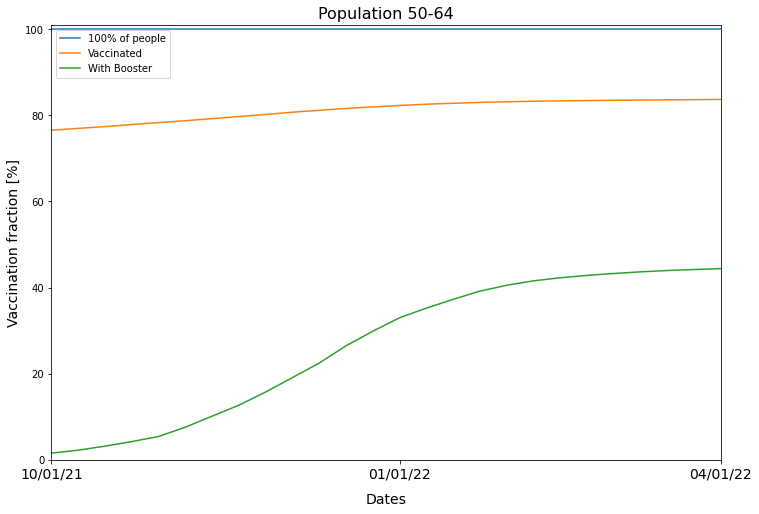

In [26]:
weeks = list(set(df['mmwr_week']))
print(weeks)

ppl_vax = []
ppl_novax = []
ppl_boost = []
for week in weeks:
    ppl_vaccinated = sum(df.loc[(df['mmwr_week'] == week)]['primary_series_only_population'])
    ppl_unvaccinated = sum(df.loc[(df['mmwr_week'] == week)]['unvaccinated_population'])
    ppl_boosted = sum(df.loc[(df['mmwr_week'] == week)]['boosted_population'])
    ppl_all = ppl_vaccinated + ppl_unvaccinated + ppl_boosted
    ppl_vax.append((ppl_vaccinated+ppl_boosted)*100/ppl_all)
    ppl_novax.append(ppl_unvaccinated*100/ppl_all)
    ppl_boost.append(ppl_boosted*100/ppl_all)

ppl_all = {
    'With Booster': ppl_boost,
    'Fully vaccinated': ppl_vax,
    'Unvaccinated': ppl_novax, 
}
weeks_new = []
for week in weeks:
    week2 = str(week)
    weeks_new.append(week2)
weeks = weeks_new

fig, ax = plt.subplots()
ax.plot(weeks, len(weeks)*[100], label='100% of people')
ax.plot(weeks, ppl_vax, label='Vaccinated')
ax.plot(weeks, ppl_boost, label='With Booster')
ax.legend(loc='upper left')
ax.set_title("Population 50-64", fontsize=16)
ax.set_ylabel("Vaccination fraction [%]", fontsize=14)
ax.set_xlabel("Dates", fontsize=14, labelpad=12)
plt.xticks(['202140', '202201', '202213'], ['10/01/21', '01/01/22', '04/01/22'], fontsize=14)
plt.xlim(['202140', '202213'])
plt.ylim([0, 101])
#plt.rcParams['savefig.facecolor']='white'
#plt.savefig("vax_50-64.png")
plt.show()